In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Files to load
file_to_load = "Resources/cleaned_superstore_master.csv"
# Read the CSV into a DataFrame
cleaned_superstore_df = pd.read_csv(file_to_load)
cleaned_superstore_df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,...,2,0.0,106.140,35.46,Medium,2011,2011-01,0.0,204.150,151.08
1,1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,3,0.1,36.036,9.72,Medium,2011,2011-01,10.0,40.122,28.11
2,2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,...,4,0.0,29.640,8.17,High,2011,2011-01,0.0,16.530,9.12
3,3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,...,3,0.5,-26.055,4.82,High,2011,2011-01,50.0,14.955,23.64
4,4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,...,5,0.1,37.770,4.70,Medium,2011,2011-01,10.0,22.734,15.18


In [3]:
print(len(cleaned_superstore_df["City"].unique()))

3636


In [4]:
# Get the column names
cleaned_superstore_df.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Year', 'Month_Year',
       'Discount_percentage', 'Selling Price Per Unit', 'Cost Price Per Unit'],
      dtype='object')

In [5]:
# Get dtypes
cleaned_superstore_df.dtypes

Unnamed: 0                  int64
Row ID                      int64
Order ID                   object
Order Date                 object
Ship Date                  object
Ship Mode                  object
Customer ID                object
Customer Name              object
Segment                    object
City                       object
State                      object
Country                    object
Market                     object
Region                     object
Product ID                 object
Category                   object
Sub-Category               object
Product Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Shipping Cost             float64
Order Priority             object
Year                        int64
Month_Year                 object
Discount_percentage       float64
Selling Price Per Unit    float64
Cost Price Per Unit       float64
dtype: object

In [6]:
# Category vs sales
cleaned_superstore_df.groupby("Category").sum()["Sales"].sort_values(ascending=False)

Category
Technology         4.744557e+06
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Name: Sales, dtype: float64

In [7]:
# Sub-Category vs Sales
cleaned_superstore_df.groupby(["Sub-Category"]).sum()["Sales"].sort_values(ascending=False)

Sub-Category
Phones         1.706824e+06
Copiers        1.509436e+06
Chairs         1.501682e+06
Bookcases      1.466572e+06
Storage        1.127086e+06
Appliances     1.011064e+06
Machines       7.790601e+05
Tables         7.570419e+05
Accessories    7.492370e+05
Binders        4.619115e+05
Furnishings    3.855783e+05
Art            3.720920e+05
Paper          2.442917e+05
Supplies       2.430742e+05
Envelopes      1.709043e+05
Fasteners      8.324232e+04
Labels         7.340403e+04
Name: Sales, dtype: float64

In [8]:
# Region vs Sales
cleaned_superstore_df.groupby(["Region"]).sum()["Sales"].sort_values(ascending=False)

Region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
North Asia        8.483098e+05
EMEA              8.061613e+05
Africa            7.837732e+05
Central Asia      7.528266e+05
West              7.254578e+05
East              6.787812e+05
Caribbean         3.242809e+05
Canada            6.692817e+04
Name: Sales, dtype: float64

In [9]:
# State vs sales
cleaned_superstore_df.groupby(["State"]).sum()["Sales"].sort_values(ascending=False)

State
England               485170.9710
California            457687.6315
Ile-de-France         317822.5440
New York              310876.2710
New South Wales       270487.1040
                         ...     
Pernik                    14.8200
Manicaland                11.8530
Bitola                    10.9800
Kabarole                   3.5730
Matabeleland North         3.4650
Name: Sales, Length: 1094, dtype: float64

In [10]:
# City vs Sales
cleaned_superstore_df.groupby(["City"]).sum()["Sales"].sort_values(ascending=False)

City
New York City    256368.1610
Los Angeles      175851.3410
Manila           120886.9485
Seattle          119540.7420
San Francisco    112669.0920
                    ...     
Ormond Beach          2.8080
Pensacola             2.2140
Jupiter               2.0640
Elyria                1.8240
Abilene               1.3920
Name: Sales, Length: 3636, dtype: float64

In [11]:
# Order_Priority vs Shipping_cost
cleaned_superstore_df.groupby("Order Priority").sum()["Shipping Cost"].sort_values(ascending=False)

Order Priority
Medium      542815.98
High        509547.12
Critical    234824.28
Low          65633.31
Name: Shipping Cost, dtype: float64

In [12]:
# Top 10 sales vs products id
top10_product_sales = cleaned_superstore_df.groupby(["Product ID"]).sum()["Sales"].sort_values(ascending=False)
top10_product_sales.head(10)

Product ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64

In [13]:
# Top 10 profitable products
top10_product_profit = cleaned_superstore_df.groupby(["Product ID"]).sum()["Profit"].sort_values(ascending=False)
top10_product_profit.head(10)

Product ID
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: Profit, dtype: float64

In [14]:
# Quantity per product
cleaned_superstore_df.groupby("Product ID").sum()["Quantity"]

Product ID
FUR-ADV-10000002     3
FUR-ADV-10000108     7
FUR-ADV-10000183    31
FUR-ADV-10000188     7
FUR-ADV-10000190     2
                    ..
TEC-STA-10004181    11
TEC-STA-10004536     6
TEC-STA-10004542    23
TEC-STA-10004834     5
TEC-STA-10004927     2
Name: Quantity, Length: 10292, dtype: int64

In [15]:
# Order summary/ Table 1
global_order_df = cleaned_superstore_df[["Order Date","Sales","Profit","Year","Month_Year","Category", "Sub-Category"]]
global_order_df.head()

,Order Date,Sales,Profit,Year,Month_Year,Category,Sub-Category
0,2011-01-01,408.300,106.140,2011,2011-01,Office Supplies,Storage
1,2011-01-01,120.366,36.036,2011,2011-01,Office Supplies,Supplies
2,2011-01-01,66.120,29.640,2011,2011-01,Office Supplies,Storage
3,2011-01-01,44.865,-26.055,2011,2011-01,Office Supplies,Paper
4,2011-01-01,113.670,37.770,2011,2011-01,Furniture,Furnishings


In [16]:
# Number of orders per year and month
global_order_df.groupby('Year')['Month_Year'].value_counts()

Year  Month_Year
2011  2011-12       1138
      2011-09        961
      2011-11        897
      2011-08        816
      2011-06        801
      2011-10        734
      2011-07        670
      2011-03        653
      2011-01        621
      2011-04        611
      2011-05        562
      2011-02        534
2012  2012-11       1279
      2012-12       1138
      2012-09       1090
      2012-06       1066
      2012-08        993
      2012-10        929
      2012-05        914
      2012-03        824
      2012-07        756
      2012-04        721
      2012-01        629
      2012-02        623
2013  2013-09       1492
      2013-11       1491
      2013-12       1427
      2013-06       1419
      2013-08       1337
      2013-05       1159
      2013-10       1119
      2013-07       1008
      2013-04        900
      2013-03        896
      2013-01        797
      2013-02        754
2014  2014-11       1993
      2014-12       1831
      2014-09       1694
      20

In [18]:
# Sales and profit table
global_sales_df = global_order_df.groupby(['Year','Month_Year']).sum()
global_sales_df

Sales       Profit
Year Month_Year                           
2011 2011-01     138241.30042  13457.23302
     2011-02     134969.94086  17588.83726
     2011-03     171455.59372  16169.36062
     2011-04     128833.47034  13405.46924
     2011-05     148146.72092  14777.45792
     2011-06     189338.43966  25932.87796
     2011-07     162034.69756  10631.84406
     2011-08     219223.49524  19650.67124
     2011-09     255237.89698  32313.25458
     2011-10     204675.07846  30745.54166
     2011-11     214934.29386  21261.40536
     2011-12     292359.96752  33006.85862
2012 2012-01     162800.89338  19627.42058
     2012-02     152661.15144  17828.18244
     2012-03     201608.72784  22752.87684
     2012-04     187469.96192  20804.00532
     2012-05     218960.16042  22865.39572
     2012-06     249289.77172  34358.03962
     2012-07     174394.02808  21725.18808
     2012-08     271669.66086  36511.44996
     2012-09     256567.85308  25039.93498
     2012-10     239321.09904  27773.87454
     2012-11     270723.05356  26160.60686
     2012-12     291972.33306  31968.30416
2013 2013-01     206459.19582  26052.40252
     2013-02     191062.77216  31553.99756
     2013-03     230547.79468  34873.71938
     2013-04     233181.34844  26008.05144
     2013-05     304509.96336  39053.30946
     2013-06     341162.34370  43298.85000
     2013-07     223642.65664  27019.91294
     2013-08     323876.60716  32977.75576
     2013-09     326897.27044  18850.09084
     2013-10     270121.87570  27871.97470
     2013-11     383039.21248  51720.88568
     2013-12     371245.40880  47654.27990
2014 2014-01     268265.52240  31447.74660
     2014-02     244159.30486  29454.01876
     2014-03     347720.96868  50097.04458
     2014-04     302132.54000  35709.53320
     2014-05     304798.83604  34335.60404
     2014-06     372577.23298  40869.02108
     2014-07     278672.17326  26450.70856
     2014-08     432731.04194  46443.47934
     2014-09     405436.70584  52533.83284
     2014-10     406659.41500  52342.49740
     2014-11     508954.73156  55561.72406
     2014-12     427757.39800  48920.76000

In [20]:
# Create seperate tables per year
global_sales_2011 = global_sales_df.loc[(2011,slice(None)),:].reset_index()
global_sales_2012 = global_sales_df.loc[(2012,slice(None)),:].reset_index()
global_sales_2013 = global_sales_df.loc[(2013,slice(None)),:].reset_index()
global_sales_2014 = global_sales_df.loc[(2014,slice(None)),:].reset_index()
global_sales_2011

,Year,Month_Year,Sales,Profit
0,2011,2011-01,138241.30042,13457.23302
1,2011,2011-02,134969.94086,17588.83726
2,2011,2011-03,171455.59372,16169.36062
3,2011,2011-04,128833.47034,13405.46924
4,2011,2011-05,148146.72092,14777.45792
5,2011,2011-06,189338.43966,25932.87796
6,2011,2011-07,162034.69756,10631.84406
7,2011,2011-08,219223.49524,19650.67124
8,2011,2011-09,255237.89698,32313.25458
9,2011,2011-10,204675.07846,30745.54166


In [21]:
global_sales_info_df = cleaned_superstore_df[["Order ID","Order Date","Sales", "Quantity", "Discount", "Profit", "Selling Price Per Unit", "Cost Price Per Unit"]]
global_sales_info_df.head()

,Order ID,Order Date,Sales,Quantity,Discount,Profit,Selling Price Per Unit,Cost Price Per Unit
0,AG-2011-2040,2011-01-01,408.300,2,0.0,106.140,204.150,151.08
1,IN-2011-47883,2011-01-01,120.366,3,0.1,36.036,40.122,28.11
2,HU-2011-1220,2011-01-01,66.120,4,0.0,29.640,16.530,9.12
3,IT-2011-3647632,2011-01-01,44.865,3,0.5,-26.055,14.955,23.64
4,IN-2011-47883,2011-01-01,113.670,5,0.1,37.770,22.734,15.18


In [22]:
global_shipping_df = cleaned_superstore_df[["Order ID", "Product ID", "Product Name", "Quantity","State","Country","Ship Mode", "Shipping Cost", "Quantity"]]
global_shipping_df.head()

,Order ID,Product ID,Product Name,Quantity,State,Country,Ship Mode,Shipping Cost,Quantity
0,AG-2011-2040,OFF-TEN-10000025,"Tenex Lockers, Blue",2,Constantine,Algeria,Standard Class,35.46,2
1,IN-2011-47883,OFF-SU-10000618,"Acme Trimmer, High Speed",3,New South Wales,Australia,Standard Class,9.72,3
2,HU-2011-1220,OFF-TEN-10001585,"Tenex Box, Single Width",4,Budapest,Hungary,Second Class,8.17,4
3,IT-2011-3647632,OFF-PA-10001492,"Enermax Note Cards, Premium",3,Stockholm,Sweden,Second Class,4.82,3
4,IN-2011-47883,FUR-FU-10003447,"Eldon Light Bulb, Duo Pack",5,New South Wales,Australia,Standard Class,4.70,5


In [23]:
# Load us sales data csv for United states sales data analysis
load_file = "Resources/cleaned_us_data.csv"
# Read the CSV into a DataFrame
cleaned_us_data_df = pd.read_csv(load_file)
cleaned_us_data_df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,7,34662,CA-2011-115161,2011-01-02,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,...,2,0.15,3.4196,54.64,High,2011,2011-01,15.0,145.333,143.6232
1,27,37844,CA-2011-113880,2011-01-03,2011-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,...,6,0.30,-172.1172,70.05,High,2011,2011-01,30.0,105.686,134.3722
2,32,31454,CA-2011-104269,2011-01-03,2011-06-03,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,...,2,0.20,51.4764,47.89,Medium,2011,2011-01,20.0,228.784,203.0458
3,34,39607,CA-2011-168312,2011-01-03,2011-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,...,3,0.30,-43.0296,32.70,Medium,2011,2011-01,30.0,125.503,139.8462
4,36,39245,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,...,6,0.30,0.0000,25.22,Medium,2011,2011-01,30.0,60.375,60.3750


<AxesSubplot:>

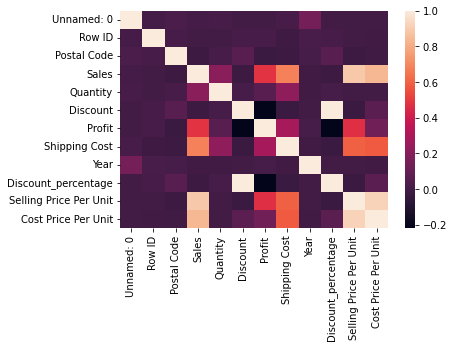

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = cleaned_us_data_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [25]:
cleaned_us_data_df["Quantity"].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [26]:
cleaned_us_data_df[cleaned_us_data_df["Quantity"].isin([i for i in range(1,7)])]['Quantity'].unique()

array([2, 6, 3, 5, 4, 1], dtype=int64)